In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
y_test=pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.drop(['Name','Cabin','PassengerId','Ticket'],axis=1,inplace=True)

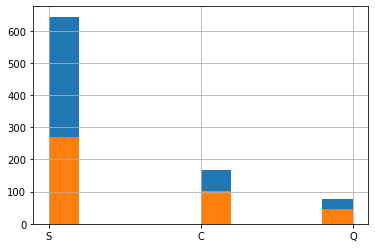

In [6]:
train.Embarked.hist()
test.Embarked.hist()

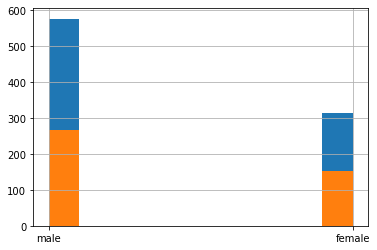

In [7]:
train.Sex.hist()
test.Sex.hist()

In [8]:
test.drop(['Name','Cabin','PassengerId','Ticket'],axis=1,inplace=True)

In [9]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex']=le.fit_transform(test['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])
test['Embarked']=le.fit_transform(test['Embarked'])

In [11]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [12]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [13]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [14]:
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [15]:
X_train=train.drop('Survived',axis=1)
X_test=test
y_train=train.pop('Survived')
y_test=y_test.pop('Survived')

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5,max_depth=3,random_state=100)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       random_state=100)

In [17]:
y_pred=dtree.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.8038277511961722

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rdf=RandomForestClassifier(random_state=0)
rdf.fit(X_train,y_train)
pred=rdf.predict(X_test)

In [21]:
accuracy_score(y_test,pred)

0.80622009569378